In [1]:
from __future__ import absolute_import, division

import tensorflow as tf
import tensorflow.keras as keras 

import numpy as np
from pathlib import Path 

import PIL 
import imageio
from IPython import display

print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.debugging.set_log_device_placement(False)
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
    # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
        
import matplotlib.pyplot as plt
import sys 

sys.path.insert(0, "..")

from gan.networks import Generator, Discriminator, GAN

2.2.0
Num GPUs Available:  1
1 Physical GPUs, 1 Logical GPUs


#### Prepare MNIST data

In [2]:
data_path = Path("..") / "data"

In [3]:
data_path.resolve()

PosixPath('/home/ganesh/workspace/python/GAN/data')

In [4]:
(train_image, train_labels), (_, _) = keras.datasets.mnist.load_data(path=(data_path / "mnist.npz").resolve())

In [5]:
train_images = train_image.reshape(train_image.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5 

In [8]:
BUFFER_SIZE = 60000
BATCH_SIZE = 32

In [9]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [10]:
latent_dim = 100

#### Prepare Model

In [17]:
def loss_fn(labels, output):
    return keras.losses.BinaryCrossentropy(from_logits=True)(labels, output)

In [18]:
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.05)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.05)

In [19]:
def plot_losses(dlosses, glosses):
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.plot(dlosses, label="Discriminative Loss")
    ax.plot(glosses, label="Generative Loss")
    ax.set_xlabel("Batch")
    ax.set_ylabel("Loss")
    ax.legend()

In [20]:
discriminator = Discriminator()
generator = Generator()
gan = GAN(discriminator, generator)

In [21]:
gan.compile(discriminator_optimizer, generator_optimizer, loss_fn, latent_dim)

In [ ]:
gan.fit(train_dataset, epochs=450)

Epoch 1/450
1875/1875 [==============================] - 15s 8ms/step - d_loss: 0.6338 - g_loss: 0.8871
Epoch 2/450
1875/1875 [==============================] - 14s 8ms/step - d_loss: 0.6408 - g_loss: 0.8886
Epoch 3/450
1875/1875 [==============================] - 15s 8ms/step - d_loss: 0.6145 - g_loss: 0.9614
Epoch 4/450
1875/1875 [==============================] - 14s 8ms/step - d_loss: 0.6044 - g_loss: 1.0121
Epoch 5/450
1875/1875 [==============================] - 14s 8ms/step - d_loss: 0.5995 - g_loss: 1.0350
Epoch 6/450
1875/1875 [==============================] - 14s 8ms/step - d_loss: 0.5944 - g_loss: 1.0579
Epoch 7/450
1875/1875 [==============================] - 14s 8ms/step - d_loss: 0.5884 - g_loss: 1.0827
Epoch 8/450
1875/1875 [==============================] - 14s 8ms/step - d_loss: 0.5817 - g_loss: 1.1088
Epoch 9/450
1875/1875 [==============================] - 14s 8ms/step - d_loss: 0.5765 - g_loss: 1.1260
Epoch 10/450
1875/1875 [==============================] - 15s 8m

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1875/1875 [==============================] - 15s 8ms/step - d_loss: 0.4978 - g_loss: 1.6045
Epoch 342/450
1875/1875 [==============================] - 15s 8ms/step - d_loss: 0.5007 - g_loss: 1.6039
Epoch 343/450
1875/1875 [==============================] - 15s 8ms/step - d_loss: 0.4989 - g_loss: 1.6061
Epoch 344/450
1875/1875 [==============================] - 15s 8ms/step - d_loss: 0.4999 - g_loss: 1.6159
Epoch 345/450
1875/1875 [==============================] - 15s 8ms/step - d_loss: 0.4980 - g_loss: 1.6052
Epoch 346/450
1875/1875 [==============================] - 15s 8ms/step - d_loss: 0.4974 - g_loss: 1.6053
Epoch 347/450
1875/1875 [==============================] - 15s 8ms/step - d_loss: 0.4969 - g_loss: 1.6145
Epoch 348/450
1875/1875 [==============================] - 15s 8ms/step - d_loss: 0.5020 - g_loss: 1.6135
Epoch 349/450
1875/1875 [==============================] - 15s 8ms/step - d_loss: 0.4971 - g_loss: 1.6155
Epoch 350/450
1875/1875 [==============================] - 1

#### Testing Generator

In [41]:
noise = tf.random.normal([1, 100])

In [42]:
generated_image = generator(noise)

In [43]:
generator.summary()

Model: "generator_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              multiple                  1254400   
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr multiple                  819200    
_________________________________________________________________
conv2d_transpose_4 (Conv2DTr multiple                  204800    
_________________________________________________________________
conv2d_transpose_5 (Conv2DTr multiple                  1600      
_________________________________________________________________
batch_normalization_3 (Batch multiple                  50176     
_________________________________________________________________
batch_normalization_4 (Batch multiple                  512       
_________________________________________________________________
batch_normalization_5 (Batch multiple                  

In [44]:
pred = discriminator(generated_image)

In [45]:
pred

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[2.3145607]], dtype=float32)>

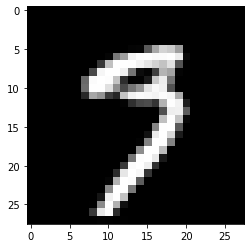

In [46]:
plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [50]:
generator.save(Path("..") / "gan" / "model" / "generator", save_format="tf")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ../gan/model/generator/assets


In [51]:
discriminator.save(Path("..") / "gan" / "model" / "discriminator", save_format="tf")

INFO:tensorflow:Assets written to: ../gan/model/discriminator/assets


### Load model and predict

In [2]:
generator = Generator()

In [3]:
generator = keras.models.load_model(Path("..") / "gan" / "model" / "generator")

In [14]:
noise = tf.random.normal([1, 100])
generated_image = generator(noise)

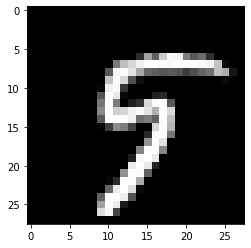

In [15]:
plt.imshow(generated_image[0, :, :, 0], cmap='gray')